In [1]:
# We start with a clean conda install with python 3.8
import sys
!which {sys.executable}
!{sys.executable} -m pip install -U pip pandas sklearn matplotlib seaborn

/home/xyntek/miniconda3/envs/datascience/bin/python3
Requirement already up-to-date: pip in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (20.1.1)
Requirement already up-to-date: pandas in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (1.0.4)
Requirement already up-to-date: sklearn in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (0.0)
Requirement already up-to-date: matplotlib in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (3.2.1)
Requirement already up-to-date: seaborn in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (0.10.1)


In [2]:
import seaborn as sns
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
sns.set()

In [3]:
import pandas as pd
data = pd.read_pickle("./data_other.pkl")
data.head()

,Anteil Bruttoarbeitsentgelt bis 2.000,Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000,Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000,Anteil Bruttoarbeitsentgelt über 5.000,Median Bruttoarbeitsentgelte,Stadtteilnummer,Anteil Wahlberechtigte ohne Sperrvermerk,Anteil Wähler,Anteil darunter Wähler mit Wahlschein,Anteil ungültige Stimmen,...,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,,,,
Altstadt,0.24,0.40,0.14,0.22,"3,270.00",1,73.20,74.80,34.40,0.40,...,0.40,1.90,0.00,0.00,0.30,0.00,0.20,0.30,0.80,0.20
Innenstadt,0.29,0.39,0.11,0.21,"2,932.00",2,71.60,67.60,40.00,0.80,...,0.20,2.00,0.00,0.10,0.10,0.00,0.40,0.20,0.70,0.40
Bahnhofsviertel,nan,nan,nan,nan,nan,10,73.00,74.10,34.60,1.20,...,0.20,1.90,0.00,0.10,0.20,0.00,0.10,0.30,0.60,0.20
Westend-Süd,0.09,0.24,0.14,0.54,"5,247.00",4,62.80,84.80,42.00,0.40,...,0.10,0.60,0.00,0.00,0.20,0.00,0.10,0.20,0.40,0.20
Westend-Nord,0.15,0.31,0.15,0.39,"4,236.00",5,69.30,78.60,37.30,0.60,...,0.10,0.70,0.00,0.00,0.10,0.10,0.20,0.10,0.40,0.20


Nun werden von den gesäuberten Daten nur noch die für unsere Trainings relevaten Daten behalten. Als Resultat erhalten wie DataFrames X und Y.

X ist die Eingabe

Y ist die erwartete Ausgabe

In [4]:
df = data.drop(['Bahnhofsviertel','Berkersheim']) # remove missing values
X = df[list(df)[0:5:]]
display(list(X))
Y = df[list(df)[10::]] # CDU bis V-Partei³
display(list(Y))

['Anteil Bruttoarbeitsentgelt bis 2.000',
 'Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000',
 'Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000',
 'Anteil Bruttoarbeitsentgelt über 5.000',
 'Median Bruttoarbeitsentgelte']

['Anteil CDU',
 'Anteil SPD',
 'Anteil GRÜNE',
 'Anteil DIE LINKE',
 'Anteil AfD',
 'Anteil FDP',
 'Anteil PIRATEN',
 'Anteil NPD',
 'Anteil FREIE WÄHLER',
 'Anteil Die PARTEI',
 'Anteil BüSo',
 'Anteil MLPD',
 'Anteil BGE',
 'Anteil DKP',
 'Anteil DM',
 'Anteil ÖDP',
 'Anteil Tierschutzpartei',
 'Anteil V-Partei³']

Der nächste Schritt ist es verschiedene Modelle zu trainieren und zu untersuchen. Als Vorbereitung für das Training teilen wir die Daten in Trainings und Testdaten auf.

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.15, random_state=1337)
display(xtrain.head())

,Anteil Bruttoarbeitsentgelt bis 2.000,Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000,Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000,Anteil Bruttoarbeitsentgelt über 5.000,Median Bruttoarbeitsentgelte
Stadtteil,,,,,
Seckbach,0.24,0.47,0.11,0.18,"2,984.00"
Bornheim,0.17,0.47,0.15,0.21,"3,341.00"
Bockenheim,0.16,0.40,0.15,0.29,"3,720.00"
Niederursel,0.24,0.48,0.12,0.16,"2,995.00"
Nordend-West,0.12,0.35,0.16,0.37,"4,172.00"


Da wir mehrere Outputs haben und die Output beliebige Werte zwischen 0-100 annehmen können, handelt es sich hier um ein Multi-Target-Regressions-Problem.

Die Wahl der Regressoren fiel hier auf [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) und [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) der sklean Bibliothek. Diese bieten mit Hilfe der [MultiOutputRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html?highlight=multioutputregressor#sklearn.multioutput.MultiOutputRegressor) Klasse einen intuitiven Weg Multi-Target-Regressions-Probleme zu bearbeiten.

Im Folgenden ist das Training eines GradientBoostingRegressor auf unserem Datensatz

In [88]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score as evs

def createResultDataframe(testY, predictY):
    '''Returns a DataFrame with the same labels and dimensions as ytest'''
    return pd.DataFrame(index=testY.index,columns=list(testY),data=predictY)

modelBoostSimple = MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=1337))
predictYBoost = createResultDataframe(ytest, modelBoostSimple.fit(xtrain, ytrain).predict(xtest))

modelForestSimple = MultiOutputRegressor(estimator=RandomForestRegressor(random_state=1337))
predictYForest = createResultDataframe(ytest, modelForestSimple.fit(xtrain, ytrain).predict(xtest))


resultData = [[mse(ytest,output),r2(ytest,output), evs(ytest,output)] for output in [predictYBoost, predictYForest]]
resultDataFrame = pd.DataFrame(index=["GradientBoosting","RandomForest"],columns=["MeanSquared","r2","explainedVariance"],data=resultData)
print("Auswertung der ersten Modelle:")
display(resultDataFrame)

Auswertung der ersten Modelle:


,MeanSquared,r2,explainedVariance
GradientBoosting,1.72,-0.17,0.05
RandomForest,1.63,0.06,0.19


Hier testen wir Unterschied die Modelle auf den gleichen Trainingsdaten bei mehrfacher Ausführung haben. Als Maß zum Vergleich wird der Mean Squared Error verwendet.

In [42]:
from numpy.random import randint, seed, RandomState
import numpy as np
from copy import deepcopy
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score as evs

repeat = 100
seed = 1337



def repeat_training(x_train, y_train, regressor, repeat, seed):
    random_state = RandomState(seed)
    seeds = random_state.randint(10000000,size=repeat)
    for i in range(repeat):
        temp_reg = deepcopy(regressor)
        temp_reg.set_params(estimator__random_state=seeds[i])
        yield temp_reg.fit(x_train, y_train)    

        
#display(regressor.get_params().keys())

def scores(testY, predictY):
    return [mse(testY,predictY),r2(testY,predictY), evs(testY,predictY)]
    

modelBoost = MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=seed))
modelForest = MultiOutputRegressor(estimator=RandomForestRegressor(random_state=seed))

resultBoost   = np.asarray([scores(ytest,output.predict(xtest)) for output in repeat_training(xtrain,
                                                                   ytrain,
                                                                   modelBoost,
                                                                   repeat,
                                                                   seed)])
resultForest  = np.asarray([scores(ytest,output.predict(xtest)) for output in repeat_training(xtrain,
                                                                   ytrain,
                                                                   modelForest,
                                                                   repeat,
                                                                   seed)])

array([[ 1.62046220e+00, -1.92510102e-01,  2.91986536e-02],
       [ 1.59216230e+00, -1.18686419e-01,  8.95258329e-02],
       [ 1.49943394e+00, -1.62295310e-01,  5.67148620e-02],
       [ 1.99453727e+00, -3.22951887e-01, -5.58801681e-02],
       [ 1.39404479e+00, -1.29833859e-01,  9.80662577e-02],
       [ 1.36660910e+00, -1.72600761e-01,  7.34247807e-02],
       [ 1.43298784e+00, -1.48378250e-01,  7.27250890e-02],
       [ 1.73124102e+00, -2.07098451e-01,  3.50611802e-02],
       [ 1.47413298e+00, -1.21888529e-01,  7.90377439e-02],
       [ 1.42068080e+00, -1.43923977e-01,  7.78929296e-02],
       [ 1.74889119e+00, -1.79804264e-01,  3.30339077e-02],
       [ 1.58202462e+00, -1.98450001e-01,  4.24467936e-02],
       [ 1.49584232e+00, -1.69637886e-01,  7.06081219e-02],
       [ 1.67191649e+00, -2.43542034e-01,  2.71657649e-02],
       [ 1.44912912e+00, -2.48783400e-01,  1.73443148e-02],
       [ 1.39905309e+00, -1.19145114e-01,  8.71936132e-02],
       [ 1.42504771e+00, -1.43173151e-01

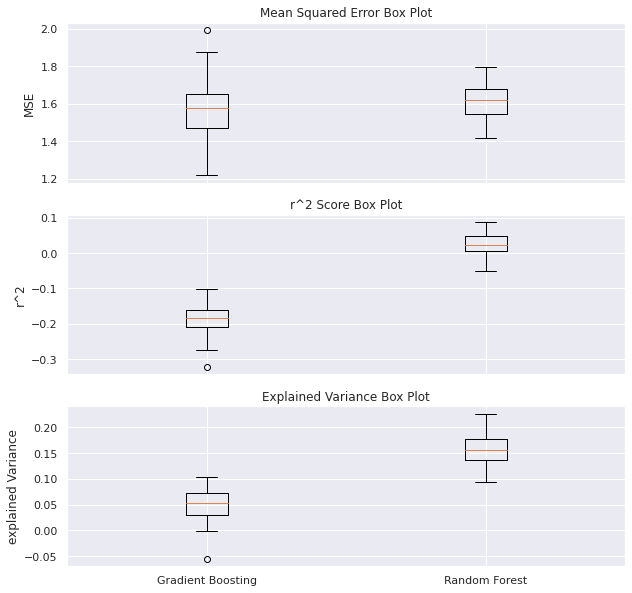

In [80]:
import matplotlib.pyplot as plt
data = [np.asarray([resultBoost.T[i],resultForest.T[i]]).T for i in range(3)]
fig, ax = plt.subplots(3,sharex=True,figsize=(10,10))
_ = ax[0].boxplot(data[0],labels=["",""])
_ = ax[0].set_ylabel("MSE")
_ = ax[0].set_title("Mean Squared Error Box Plot")
_ = ax[1].boxplot(data[1],labels=["",""])
_ = ax[1].set_ylabel("r^2")
_ = ax[1].set_title("r^2 Score Box Plot")
_ = ax[2].boxplot(data[2],labels=["Gradient Boosting","Random Forest"])
_ = ax[2].set_ylabel("explained Variance")
_ = ax[2].set_title("Explained Variance Box Plot")
plt.show()
fig.savefig("./latex/figure/localminimum.pdf", 
            format='pdf', 
            bbox_inches = 'tight',
            pad_inches = 0
           )

Ein MSE von  ~3.15 bei Werten zwischen 0-100 sieht nicht schlecht aus.

In [82]:
from copy import deepcopy
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, explained_variance_score as evs, make_scorer
from numpy.random import RandomState
                
boosting = MultiOutputRegressor(estimator=GradientBoostingRegressor())
forest = MultiOutputRegressor(estimator=RandomForestRegressor())
scoring = {'mse':make_scorer(mse),'r2':make_scorer(r2),'evs':make_scorer(evs)}
rkf = RepeatedKFold(n_repeats=10,random_state=1337)
data_cross_boosting = cross_validate(boosting, X, Y,scoring=scoring,cv=rkf)
data_cross_forest = cross_validate(forest, X, Y,scoring=scoring,cv=rkf)
df_cross_boosting = pd.DataFrame.from_dict(data_cross_boosting)
df_cross_forest = pd.DataFrame.from_dict(data_cross_forest)



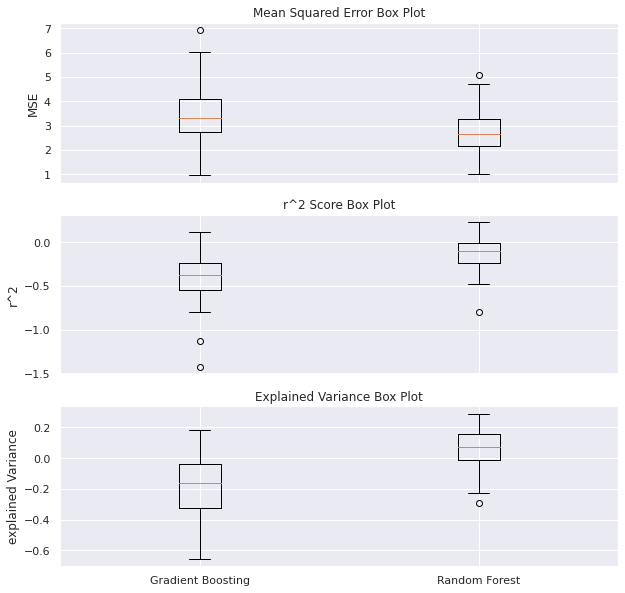

In [83]:
data = [np.asarray([df_cross_boosting[i],
                  df_cross_forest[i]]).T for i in ['test_mse','test_r2','test_evs']]
fig, ax = plt.subplots(3,sharex=True,figsize=(10,10))
_ = ax[0].boxplot(data[0],labels=["",""])
_ = ax[0].set_ylabel("MSE")
_ = ax[0].set_title("Mean Squared Error Box Plot")
_ = ax[1].boxplot(data[1],labels=["",""])
_ = ax[1].set_ylabel("r^2")
_ = ax[1].set_title("r^2 Score Box Plot")
_ = ax[2].boxplot(data[2],labels=["Gradient Boosting","Random Forest"])
_ = ax[2].set_ylabel("explained Variance")
_ = ax[2].set_title("Explained Variance Box Plot")
plt.show()
fig.savefig("./latex/figure/crossval.pdf", 
            format='pdf', 
            bbox_inches = 'tight',
            pad_inches = 0
           )


In [90]:
df_ypredGradientBoosting = pd.DataFrame(modelBoostSimple.predict(xtest) ,index=ytest.index,columns=list(ytest))
df_ypredRandomForestRegressor = pd.DataFrame(modelForestSimple.predict(xtest),index=ytest.index,columns=list(ytest))
display(df_ypredGradientBoosting.head())
display(df_ypredRandomForestRegressor.head())

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Oberrad,26.84,23.25,12.46,11.29,11.20,11.38,0.42,0.32,0.66,1.05,0.00,-0.00,0.27,0.06,0.17,0.14,1.10,0.11
Altstadt,26.94,20.14,15.40,12.33,7.81,15.78,0.38,0.16,0.26,1.41,0.00,0.09,0.27,0.01,0.18,0.23,0.85,0.15
Nordend-Ost,27.93,16.64,19.28,13.27,6.47,15.21,0.50,0.10,0.39,1.23,0.00,0.05,0.25,0.10,0.10,0.26,0.99,0.26
Fechenheim,19.88,25.86,12.98,14.69,10.61,9.93,0.57,0.36,0.41,1.51,0.00,0.29,0.29,0.13,0.15,0.23,1.38,0.15
Griesheim,19.80,25.86,11.45,14.54,10.60,9.93,0.56,0.36,0.41,1.41,0.00,0.29,0.26,0.13,0.18,0.22,1.64,0.15


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Oberrad,26.73,23.94,12.99,11.36,10.52,11.07,0.49,0.29,0.59,1.11,0.00,0.04,0.24,0.07,0.17,0.13,1.10,0.13
Altstadt,26.34,20.62,14.53,12.42,7.95,14.31,0.38,0.16,0.37,1.31,0.00,0.08,0.27,0.03,0.15,0.20,0.79,0.23
Nordend-Ost,28.39,16.43,17.12,11.67,6.46,16.82,0.46,0.10,0.36,1.17,0.00,0.04,0.24,0.04,0.11,0.24,0.84,0.24
Fechenheim,23.12,24.86,10.97,13.66,11.62,10.40,0.61,0.37,0.55,1.53,0.00,0.22,0.27,0.08,0.28,0.24,1.28,0.16
Griesheim,23.34,24.72,10.10,13.49,11.82,10.40,0.62,0.37,0.58,1.48,0.00,0.22,0.23,0.08,0.29,0.23,1.55,0.18


In [ ]:
import numpy as np
#
import matplotlib.pyplot as plt
def plotAll(dfs,columnNames,parties=None,shape=None):
    columns = list(ytest) if parties == None else parties
    if shape == None:
        shape=(len(columns),1)
    columns = np.asarray(columns).reshape(shape)
    fig, axes = plt.subplots(nrows=shape[0],
                             ncols=shape[1], 
                             sharex=True, 
                             sharey=True, 
                             figsize=(10,10)
                            )

    for i, stadtteil in np.ndenumerate(columns):
        df_stadtteil = pd.DataFrame(index=ytest.index)
        df_stadtteil['ground truth'] = ytest[stadtteil]
        for j, df in enumerate(dfs):
            df_stadtteil[columnNames[j]] = df[stadtteil]
        df_stadtteil.plot.bar(ax=axes[i],legend=False)
        axes[i].set_ylabel(stadtteil)

    for i, _ in np.ndenumerate(columns):
        axes[i].yaxis.label.set_visible(True)
        axes[i].tick_params(
            axis = 'x',    
            which = 'both',
            bottom = (i[0]==shape[0]-1), 
            top = (i[0]==0),   
            labelbottom = (i[0]==shape[0]-1),
            labeltop = (i[0]==0),
            rotation=70
        )
    axes[0][shape[1]-1].legend(loc="center",bbox_to_anchor=(0.4,0.3))   
        
    fig.savefig('./latex/figure/simple_parties.pdf', 
                format='pdf', 
                bbox_inches = 'tight',
                pad_inches = 0
               )

big_parties = ['Anteil CDU','Anteil SPD','Anteil GRÜNE','Anteil DIE LINKE','Anteil AfD','Anteil FDP']
plotAll([df_ypredGradientBoosting, df_ypredRandomForestRegressor]
        ,['GradientBoosting','RandomForestRegressor'],parties=big_parties,shape=(3,2))


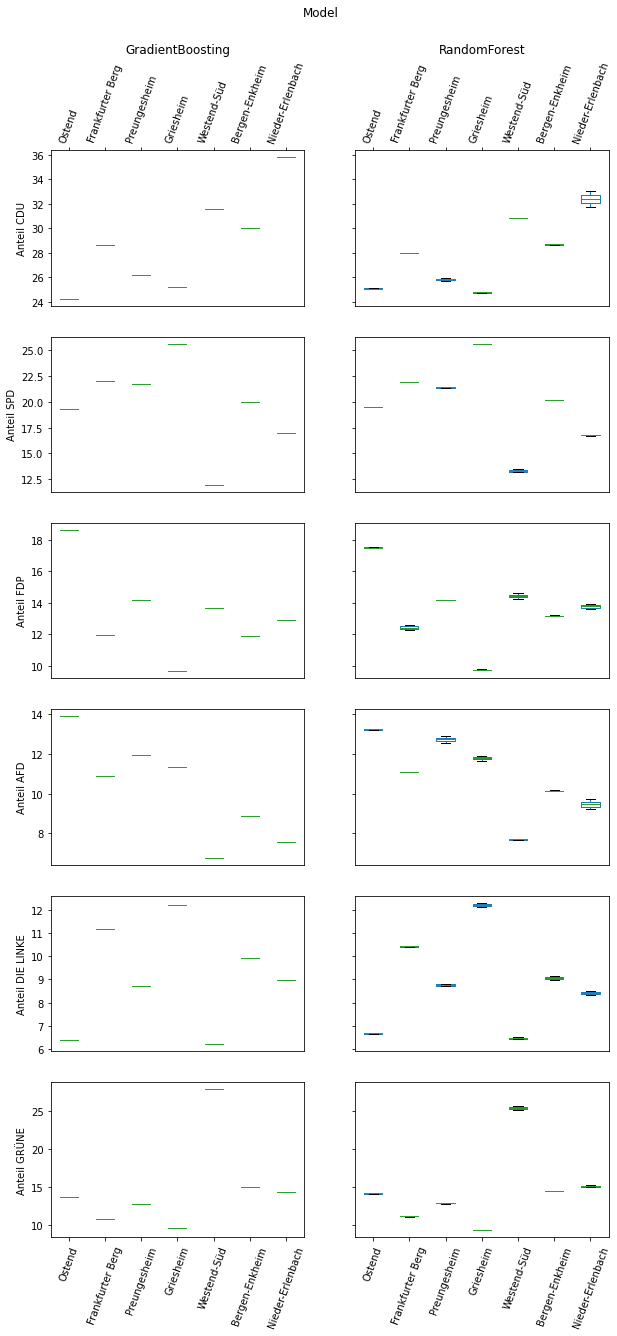

In [19]:

dfs_GradientBoosting  = [pd.DataFrame(ypredGradientBoosting,index=ytest.index,columns=list(ytest))
                         for ypredGradientBoosting in ypredGradientBoostingList]
dfs_RandomForest  = [pd.DataFrame(ypredRandomForest,index=ytest.index,columns=list(ytest)) 
                     for ypredRandomForest in ypredRandomForestList]

df_parteien_GradientBoosting_List = [pd.DataFrame([df[party] for df in dfs_GradientBoosting],index=range(timesTrained)) for party in list(ytest)]
df_parteien_RandomForest_List = [pd.DataFrame([df[party] for df in dfs_RandomForest],index=range(timesTrained)) for party in list(ytest)]


interessanteParteien = ['Anteil CDU','Anteil SPD', 'Anteil FDP', 'Anteil AFD', 'Anteil DIE LINKE', 'Anteil GRÜNE']

fig, axes = plt.subplots(nrows=len(list(interessanteParteien)),
                         ncols=timesTrained, 
                         sharex=False, 
                         sharey='row', 
                         figsize=(10,20)
                        )
for i, name in enumerate(list(interessanteParteien)):
    for j,df_list in enumerate([df_parteien_GradientBoosting_List, df_parteien_RandomForest_List]):
        df = df_list[i]
        df.plot.box(ax=axes[i,j],legend=(i==0))
        axes[i,j].set_ylabel(name)
        axes[i,j].tick_params(
            axis = 'x',    
            which = 'both',
            bottom = (i==len(list(interessanteParteien))-1), 
            top = (i==0),      
            labelbottom = (i==len(list(interessanteParteien))-1),
            labeltop = (i==0),
            rotation=70
        )
for j, name in enumerate(['GradientBoosting','RandomForest']):
    axes[0,j].set_title(name)
fig.suptitle('Model')
plt.show()
fig.savefig('./output/predict_parties_boxplot.png', 
            format='png', 
            bbox_inches = 'tight',
            pad_inches = 0
           )


In [ ]:


#df_CDU_GradientBoosting = pd.DataFrame([ypredGradientBoosting['Anteil CDU'] for ypredGradientBoosting in ypredGradientBoostingList])


#df_ypredGradientBoosting = pd.DataFrame(ypredGradientBoosting,index=ytest.index,columns=list(ytest))
#df_ypredRandomForestRegressor = pd.DataFrame(ypredRandomForestRegressor,index=ytest.index,columns=list(ytest))
#display(df_ypredGradientBoosting.head())
#display(df_ypredRandomForestRegressor.head())#

#import matplotlib.pyplot as plt
#def boxplotAll(dfs,columnNames):
#    fig, axes = plt.subplots(nrows=len(list(ytest)),
#                             ncols=1, 
#                             sharex=False, 
#                             sharey='row', 
#                             figsize=(5,40)
#                            )
#                            
#    for i,stadtteil in enumerate(list(ytest)):
#        
#        df_stadtteil = pd.DataFrame(index=ytest.index)
#        df_stadtteil['ground truth'] = ytest[stadtteil]
#        for j, df in enumerate(dfs):
#            df_stadtteil[columnNames[j]] = df[stadtteil]
#        df_stadtteil.plot.bar(ax=axes[i], legend=(i==0))
#        axes[i].set_ylabel(stadtteil)
#        axes[i].tick_params(
#            axis = 'x',    
#            which = 'both',
#            bottom = (i==len(list(ytest))-1), #
#            top = (i==0),      
#            labelbottom = (i==len(list(ytest))-1),
#            labeltop = (i==0),
#            rotation=70
#        )
        
        
    #handles, labels = axes[-1,-1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right')
#    fig.savefig('./output/predict_parties_boxplot.png', 
#                format='png', 
#                bbox_inches = 'tight',
#                pad_inches = 0
#               )

    
#plotAll([df_ypredGradientBoosting, df_ypredRandomForestRegressor]
#        ,['GradientBoosting','RandomForestRegressor'])


In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import datasets, linear_model
estimator = MultiOutputRegressor(estimator=GradientBoostingRegressor)
#help(estimator )
lasso = linear_model.Lasso()
validated = cross_validate(estimator, X, Y)
#display(Y.head())
validated

/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/multioutput.py", line 172, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/xyntek/miniconda3/env

{'fit_time': array([0.00767541, 0.00974727, 0.00865746, 0.0046947 , 0.00405169]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [49]:
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import ShuffleSplit

boosting = MultiOutputRegressor(estimator=GradientBoostingRegressor())
forest = MultiOutputRegressor(estimator=RandomForestRegressor())



display(cross_val_score(boosting, X, Y, cv=ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)))
display(cross_val_score(forest, X, Y, cv=ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)))

array([-1.12949126e+00, -3.56659905e-01, -1.24656858e+00, -2.56254608e+00,
       -2.76585751e-03, -5.13516822e-01, -2.11538535e+00, -4.10364286e-02,
       -7.22109273e-01, -3.36448127e+00])

array([-0.31249517, -0.05245859, -0.66327788, -1.7225018 ,  0.12226723,
       -0.23958171, -1.41281027,  0.06855261, -0.17952721, -2.54713749])

In [118]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
from sklearn.metrics import r2_score
def custom_cross_val_score(regressor, X, y, test_size=0.15, seed=1, repeats=1, scorer=None): 
    if scorer == None:
         scorer = (lambda y_test, y_pred : r2_score(y_test,
                                                    y_pred,
                                                    sample_weight=None,
                                                    multioutput='uniform_average'))
    
    random_state = RandomState(seed)
    for i in range (repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        current_reg = deepcopy(regressor)
        current_reg.fit(X_train,y_train)
        y_pred = current_reg.predict(X_test)
        cur_df = pd.DataFrame(index=y_test.index,columns=list(y_test),data=y_pred)
        score = scorer(y_test, y_pred)
        yield(score,y_test,cur_df)

        
myscorer = lambda y_test, y_pred : r2_score(y_test, y_pred, sample_weight=None, multioutput='raw_values')        
boosting = MultiOutputRegressor(estimator=GradientBoostingRegressor())
forest = MultiOutputRegressor(estimator=RandomForestRegressor())
for data in custom_cross_val_score(boosting, X, Y,repeats=1):
    display(*data)
for data in custom_cross_val_score(boosting, X, Y,repeats=1,scorer=myscorer):
    display(*data)

-0.6472477589337102

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20,0.40,0.10,0.10,0.70,0.00,0.00,0.10,0.10,0.20,0.10,0.40,0.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90,0.10,0.00,0.10,0.60,0.00,0.00,0.20,0.00,0.10,0.20,0.40,0.20
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30,0.40,0.10,0.50,1.00,0.10,0.00,0.30,0.10,0.10,0.20,1.00,0.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50,0.50,0.30,0.90,1.20,0.00,0.10,0.30,0.00,0.10,0.20,1.00,0.20
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70,0.70,0.20,0.50,1.70,0.00,0.10,0.30,0.10,0.30,0.20,1.00,0.30
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00,0.80,0.30,0.70,1.40,0.00,0.00,0.40,0.10,0.20,0.10,1.50,0.20
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30,0.40,0.20,0.60,1.40,0.00,0.10,0.20,0.00,0.30,0.40,1.00,0.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,32.75,15.80,13.25,8.09,7.27,18.15,0.47,0.10,0.34,0.94,0.00,0.00,0.21,0.10,0.10,0.23,0.87,0.30
Westend-Süd,36.03,15.68,17.04,6.32,8.68,17.90,0.34,0.14,0.38,1.20,0.00,0.01,0.18,0.07,0.11,0.22,0.82,0.28
Eschersheim,32.27,19.56,11.83,8.61,10.05,14.09,0.34,0.19,0.79,1.10,0.00,0.10,0.19,0.02,0.20,0.12,1.20,0.18
Nieder-Eschbach,25.70,22.36,13.76,12.44,8.23,12.36,0.39,0.24,0.49,1.22,0.00,0.03,0.27,0.02,0.12,0.13,0.77,0.22
Rödelheim,28.47,22.35,13.38,10.66,8.77,11.61,0.40,0.21,0.64,1.23,0.00,0.09,0.33,0.07,0.16,0.15,0.90,0.28
Fechenheim,25.22,25.53,11.42,11.38,11.86,9.34,0.60,0.70,0.84,1.51,0.00,0.30,0.29,0.00,0.30,0.10,1.21,0.10
Ginnheim,29.02,21.94,11.60,10.27,11.46,11.02,0.53,0.30,0.77,1.23,0.00,0.01,0.21,0.03,0.20,0.08,0.96,0.30


array([-0.84778915,  0.85872908, -0.83781971, -0.04858274, -0.03327839,
        0.6218002 ,  0.27966351, -1.67226658,  0.15970471,  0.23750708,
       -0.16666667, -5.57261892,  0.35293005, -0.31966127, -0.25946921,
       -1.21508079,  0.30262204, -3.38328906])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20,0.40,0.10,0.10,0.70,0.00,0.00,0.10,0.10,0.20,0.10,0.40,0.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90,0.10,0.00,0.10,0.60,0.00,0.00,0.20,0.00,0.10,0.20,0.40,0.20
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30,0.40,0.10,0.50,1.00,0.10,0.00,0.30,0.10,0.10,0.20,1.00,0.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50,0.50,0.30,0.90,1.20,0.00,0.10,0.30,0.00,0.10,0.20,1.00,0.20
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70,0.70,0.20,0.50,1.70,0.00,0.10,0.30,0.10,0.30,0.20,1.00,0.30
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00,0.80,0.30,0.70,1.40,0.00,0.00,0.40,0.10,0.20,0.10,1.50,0.20
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30,0.40,0.20,0.60,1.40,0.00,0.10,0.20,0.00,0.30,0.40,1.00,0.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,32.76,15.84,13.29,8.05,7.24,18.29,0.51,0.10,0.34,0.96,0.00,0.00,0.21,0.07,0.10,0.23,0.85,0.30
Westend-Süd,36.03,15.67,17.15,6.23,8.68,18.30,0.35,0.13,0.35,1.22,0.00,0.01,0.16,0.06,0.11,0.22,0.84,0.28
Eschersheim,30.62,19.56,11.83,8.61,10.01,14.26,0.33,0.19,0.79,1.09,0.00,0.10,0.21,0.02,0.20,0.12,1.19,0.18
Nieder-Eschbach,26.18,22.25,13.76,12.44,8.23,12.36,0.38,0.24,0.49,1.22,0.00,0.03,0.27,0.01,0.12,0.13,0.71,0.22
Rödelheim,28.47,22.35,13.36,10.72,8.77,11.61,0.41,0.21,0.64,1.23,0.00,0.09,0.33,0.07,0.16,0.15,0.85,0.28
Fechenheim,25.22,25.53,11.58,11.38,11.86,9.34,0.60,0.70,0.85,1.51,0.00,0.30,0.29,0.00,0.30,0.10,1.21,0.10
Ginnheim,29.02,21.94,11.65,10.40,11.45,11.02,0.51,0.30,0.77,1.23,0.00,0.01,0.21,0.03,0.20,0.08,0.92,0.30


In [119]:
only_big_Y = Y[['Anteil CDU','Anteil SPD','Anteil GRÜNE','Anteil DIE LINKE','Anteil AfD','Anteil FDP']]

pd.options.display.float_format = "{:,.2f}".format
for data in custom_cross_val_score(boosting, X, only_big_Y, repeats=10):
    display(*data)

-0.08109350371657971

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Westend-Nord,32.76,15.80,13.28,8.09,7.17,18.03
Westend-Süd,36.06,15.67,17.54,6.23,8.67,18.17
Eschersheim,30.91,19.63,11.92,8.61,10.01,14.15
Nieder-Eschbach,26.05,22.24,13.83,12.43,8.23,12.36
Rödelheim,28.54,22.35,13.39,10.72,8.64,11.61
Fechenheim,25.22,25.53,11.48,11.38,11.87,9.34
Ginnheim,29.10,21.87,11.60,10.40,11.58,11.02


-0.06099930930624899

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Bockenheim,22.50,19.00,19.10,14.10,6.00,15.10
Eckenheim,24.40,24.10,12.30,14.30,9.20,10.10
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Nied,26.70,24.50,8.80,10.50,14.20,10.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Riederwald,17.50,29.60,9.70,18.80,13.10,5.50
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Bockenheim,31.96,17.62,15.47,9.50,6.52,13.31
Eckenheim,25.95,23.41,12.16,11.58,12.25,9.43
Innenstadt,26.76,19.82,14.83,12.87,7.84,14.49
Nied,25.86,24.06,12.28,10.88,12.19,9.50
Nieder-Eschbach,26.48,22.40,14.45,11.59,7.99,12.42
Riederwald,28.63,25.15,8.87,10.03,13.20,9.45
Dornbusch,23.62,17.67,17.94,13.91,5.98,13.70


0.22775025924820327

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Niederrad,26.10,22.40,11.90,10.90,10.30,13.60
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Nordend-Ost,20.70,17.60,23.60,16.60,4.50,13.10
Praunheim,24.50,24.30,12.80,12.60,11.10,10.50
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Seckbach,25.47,23.78,13.39,11.80,10.33,10.54
Niederrad,27.01,23.47,10.83,11.40,11.26,10.66
Unterliederbach,26.97,24.22,11.49,10.65,10.69,10.66
Nordend-Ost,28.21,17.13,18.43,12.88,7.15,15.74
Praunheim,25.14,22.56,12.92,12.61,10.19,10.97
Bergen-Enkheim,27.64,19.52,14.77,12.17,8.14,13.77
Ginnheim,27.43,21.97,12.19,12.07,11.22,10.97


-0.055672223181526835

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Sachsenhausen-Nord,27.10,15.90,18.60,10.30,5.80,19.20
Niederrad,26.10,22.40,11.90,10.90,10.30,13.60
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Höchst,21.70,23.70,13.70,14.60,11.10,9.10


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Sachsenhausen-Nord,30.31,16.91,13.46,8.49,7.63,18.87
Niederrad,26.20,23.24,12.47,12.19,9.79,10.23
Westend-Nord,32.87,16.17,14.90,8.08,6.98,18.63
Gutleutviertel,33.62,17.20,14.40,8.69,8.13,14.89
Unterliederbach,28.37,23.61,9.76,9.66,11.30,11.02
Nieder-Eschbach,26.39,22.70,13.71,12.25,8.66,11.14
Höchst,26.48,23.31,12.23,11.39,12.62,10.50


-0.14230025119611986

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Riederwald,17.50,29.60,9.70,18.80,13.10,5.50
Harheim,33.90,19.00,11.80,7.40,10.20,13.10
Sindlingen,29.30,25.90,8.10,9.00,13.60,8.20
Sachsenhausen-Süd,30.20,17.40,13.60,9.10,7.60,18.90
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Unterliederbach,26.83,24.36,10.91,11.27,11.38,10.09
Riederwald,29.20,23.11,8.48,9.80,12.20,10.10
Harheim,23.39,19.88,15.24,13.09,8.00,13.63
Sindlingen,26.80,24.00,8.93,10.15,14.07,9.62
Sachsenhausen-Süd,28.57,16.58,18.54,11.10,6.29,16.47
Seckbach,24.70,24.11,13.07,12.51,10.16,11.05
Nieder-Eschbach,25.56,22.29,13.74,12.17,8.13,12.81


0.14669808706429638

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Harheim,33.90,19.00,11.80,7.40,10.20,13.10
Kalbach-Riedberg,33.60,16.90,12.80,7.20,7.40,18.30
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Ostend,23.70,19.40,18.70,14.20,6.30,13.60
Sindlingen,29.30,25.90,8.10,9.00,13.60,8.20
Griesheim,25.30,25.60,9.60,11.30,12.20,9.60


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Harheim,26.51,19.83,13.75,12.44,8.01,13.78
Kalbach-Riedberg,24.03,15.88,21.33,12.87,4.84,18.05
Dornbusch,26.83,19.01,18.55,12.66,6.91,15.06
Innenstadt,26.81,20.32,14.59,12.71,7.49,14.39
Ostend,27.04,19.51,16.09,11.66,6.78,15.12
Sindlingen,26.98,25.68,8.42,11.67,13.93,9.36
Griesheim,24.63,25.61,10.48,12.66,11.71,9.03


-0.14287408916399366

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Hausen,27.50,23.00,13.40,12.60,7.70,12.60
Höchst,21.70,23.70,13.70,14.60,11.10,9.10
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Sachsenhausen-Nord,27.10,15.90,18.60,10.30,5.80,19.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Hausen,28.90,21.55,12.36,10.07,11.44,11.74
Höchst,26.41,22.99,12.02,12.41,12.59,10.20
Bergen-Enkheim,26.61,19.41,15.42,11.84,8.18,14.04
Gutleutviertel,32.79,17.47,13.91,9.19,8.74,14.14
Innenstadt,28.60,19.90,14.68,13.15,9.30,15.49
Unterliederbach,27.42,23.94,10.16,10.02,11.38,11.05
Sachsenhausen-Nord,30.25,17.03,13.36,8.42,7.69,18.84


-0.19969031287588843

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Gallus,24.40,18.10,13.40,12.70,9.50,17.30
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Frankfurter Berg,28.80,22.00,11.90,10.80,11.20,10.70
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Nieder-Erlenbach,36.10,17.00,12.90,7.50,9.00,14.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Gallus,21.47,23.50,10.66,12.33,12.05,9.75
Bergen-Enkheim,28.08,19.61,14.91,12.03,8.16,14.03
Nieder-Eschbach,27.05,22.84,13.90,12.05,8.70,12.02
Unterliederbach,28.66,23.70,9.90,9.98,12.22,10.43
Frankfurter Berg,27.22,21.89,13.89,13.24,8.62,11.82
Gutleutviertel,26.45,16.84,14.73,11.29,8.04,16.80
Nieder-Erlenbach,26.16,16.84,14.17,12.28,6.78,15.60


-0.10313161546195758

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Nordend-Ost,20.70,17.60,23.60,16.60,4.50,13.10
Zeilsheim,31.10,24.30,7.80,8.20,14.50,8.90
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Sossenheim,30.20,22.70,8.10,9.70,13.60,10.10


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Nordend-Ost,27.83,17.11,19.12,12.74,6.99,15.59
Zeilsheim,22.21,22.90,16.52,14.43,9.15,10.11
Nieder-Eschbach,25.36,22.31,13.43,12.65,8.81,12.22
Bergen-Enkheim,28.35,19.36,14.16,11.74,8.51,13.66
Rödelheim,28.48,22.68,13.16,12.06,8.95,11.66
Seckbach,24.98,24.23,12.98,12.86,10.28,10.82
Sossenheim,22.65,23.18,10.36,14.07,12.56,9.19


-3.5983542895711884

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Höchst,21.70,23.70,13.70,14.60,11.10,9.10
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30
Kalbach-Riedberg,33.60,16.90,12.80,7.20,7.40,18.30
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60
Preungesheim,26.10,21.80,14.20,11.90,8.70,12.70
Altstadt,26.30,17.60,14.60,13.00,8.30,15.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Höchst,26.17,23.27,11.74,12.06,12.67,10.48
Eschersheim,31.41,19.60,11.79,8.64,9.98,14.09
Ginnheim,27.55,21.93,12.71,12.62,11.06,10.97
Kalbach-Riedberg,23.97,15.90,21.79,13.26,5.00,17.93
Dornbusch,22.86,19.31,18.88,14.22,6.33,14.20
Preungesheim,25.88,19.60,13.37,15.39,9.41,12.83
Altstadt,29.05,19.03,14.98,12.40,7.94,14.55
